# Übung: Auswertung einer Zeitreihe (Lösungsvorschlag)

## Beisipiel Klimawandel

Die globale Erwärmung korreliert mit dem Grand der Industrialisierung. Bemerkenswert ist die Schnelligkeit des Anstriegs.

Modelle legen nahe, dass die Temperaturerhöhung unmittelbar mit der CO2-Konzentration zusammenhängt.

Viele Zeitkonstanten des Klimasystems sind unbekannt. Gibt es eine Zeitverzögerung? Falls ja, wie groß ist sie? Gibt es Kipppunkte?

## Annahmen:

1. Es gelte die unten genannte Funktion T(CO2).
2. Die Messdaten der CO2-Konzentration sind valde.

## Aufgabe:

* Wie entwickelt sich die CO2-Konzentration in der Atmsphäre in den letzten Jahren im Vergleich zu den 1960er Jahre?
* Wie hoch wäre heute die CO2-Konzentration, wenn sich die Zunahme von 1960 bis 1980 linear entwickelt hätte?
* Wie hoch ist vermutlich die CO2-Konzentration in den Jahren 2050, 2080, 2100 und 2150?
* Welche Temperaturerhöhungen lassen sich diesen Konzentrationen zuordnen?

## Zusatzaufgabe: Abschätzen der Größenordnngen

* In welcher Größenordnung liegt die Dekarbonisierungsleistung der Vegetation auf der Erde?
* Vergleichen Sie damit die Überlegungen, CO2 aus der Verbrennung irgendwie zu speichern. Wie viele Tonnen CO2 müsste man speichern, um den CO2 Anstieg aufzufangen?
* Korrelieren CO2 Anstieg und verfeuerte fossile Brennstoffe?

Hinweise:
  
* Die Menge des Gases der Atmosphäre ist bekannt. Darüber lässt sich abschätzen, wie viele Moleküle einem ppm entsprechen, daraus die Gesamtmenge (s.a. https://hogback.atmos.colostate.edu/group/dave/pdf/ppmv.pdf): Gesamtmasse CO2 in der Atmosphäre: ca 3e15 kg. 1ppm wiegt demnach (1/400) etwas weniger als 1e13 kg = 1e10 t = 10 Gt.
    * 1ppm CO2 == 10 Gt
    * Anstieg 2022: 2.1 ppm/a , also ca. 20 Gt/a; Literaturangabe 2023: 36.8 Gt/a
* Fossile Energieträger.
    * Ölverbrauch: 4 Gt / Jahr; Als Größenordnung gilt: 0.5 kg Benzin setzen 1 kg CO2 frei.
    * Kohle:  8 Gt / Jahr. 1kg Kohle setzen 3 kg CO2 frei
        * (Warum? C: 12u; O: 16u. C + 02 -> CO2, folglich: 12 u -> 12 + 2 * 16 ~ 3 * 12u)
    * Torf: ?
    * Gas: ?
* Literaturwerte: 
    * Aufforstung: 2 Gt CO2-Binding, aber 4.2 Gt CO2 Freisetzung durch Abholzung
    * CCS und ähnlich: 1e-5 Gt = 1e4 t

Quellen:

* https://www.ipcc.ch/report/ar6/wg1/figures/summary-for-policymakers/figure-spm-1/
* https://www.klimafakten.de/fakten-statt-behauptungen/basiswissen
* CO2 concentratlion for 2023: 419.3ppm
* CO2 sink binds about 50% of emitted CO2

# Climate Change


Collect information on three topics

1. Relation between CO2-concentration and temperature
2. Measurement data on CO2 concentration
3. Measurement data on temperature (Germany only)

## 1. Relation between CO2-concentration and temperature

[How are CO₂ concentrations related to warming?](https://factsonclimate.org/infographics/concentration-warming-relationship)

https://factsonclimate.org/infographics/concentration-warming-relationship

&nbsp;


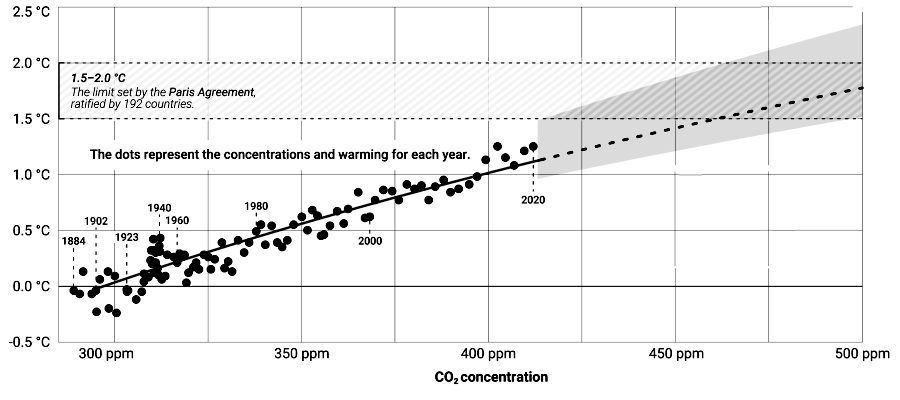

$$
\Delta T(c) = S \cdot \log_2 (\frac{c}{c_0})
$$

* S =
    * 2...3.1 K: if log_2
    * 2.9 ... 4.5 K: if log_e
* $\Delta T(c)$ = 0 for $c_0 = 300 ppm$ (year 1910)


In [1]:
import math

#math.log(m)
math.exp(1)
math.log(2)
3.1/math.log(2), 2/math.log(2) 


(4.472354626755787, 2.8853900817779268)

In [2]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def deltat(c, c0=300, S = 2.37):
    return np.math.log(c/c0,2)* S

deltatv = np.vectorize(deltat)

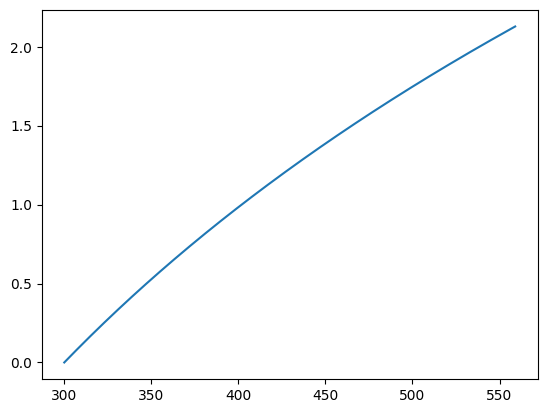

In [3]:
x = np.arange(300,560)

#for c in range(300, 500):
y = deltatv(x)

plt.plot(x,y)
plt.show()

## 2. Measurement data on CO2 concentration

### Get data: 1974 .. 2023

source: https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_daily_mlo.txt

In [4]:
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

#fn = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_daily_mlo.txt'
fn = 'data/co2_daily_mlo.zip' # 1974 till 2023

df = pd.read_csv(fn, sep='\s+', comment = "#", engine="python", 
                 names=['year', 'month', 'day', 'date', 'cc'])
df.index = pd.to_datetime(df[['year', 'month', 'day']])
df = df[['cc']]

In case of error message:

> URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:997)>

* use library ssl and add "ssl._create..." or
* use requests


In [5]:
df.head(3)

,cc
1974-05-17,333.38
1974-05-18,333.11
1974-05-19,333.46


<Axes: >

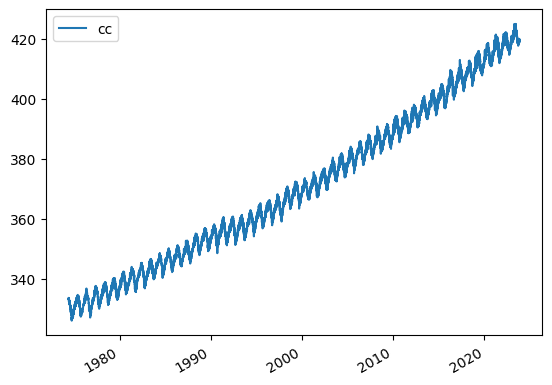

In [6]:
df.plot()

### Get data: 1958 .. 2023 

* https://www.co2.earth/co2-datasets
    * https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv

In [7]:
#fn = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv'
fn = 'data/daily_in_situ_co2_mlo.zip' # till 2023
#fn = '/home/rp/Downloads/otto.csv'

df = pd.read_csv(fn, sep='[, ]+', engine="python", comment='%', header=None,
                 na_values='NaN',
                 names =  ['year', 'month', 'day', 'cc', 'nb', 'scale', 'sta']                 
                )
df.index = pd.to_datetime(df[['year', 'month', 'day']])
df = df[['cc']]
df

,cc
1958-01-01,NaN
1958-01-02,NaN
1958-01-03,NaN
1958-01-04,NaN
1958-01-05,NaN
...,...
2023-10-27,NaN
2023-10-28,NaN
2023-10-29,NaN
2023-10-30,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24045 entries, 1958-01-01 to 2023-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc      17790 non-null  float64
dtypes: float64(1)
memory usage: 375.7 KB


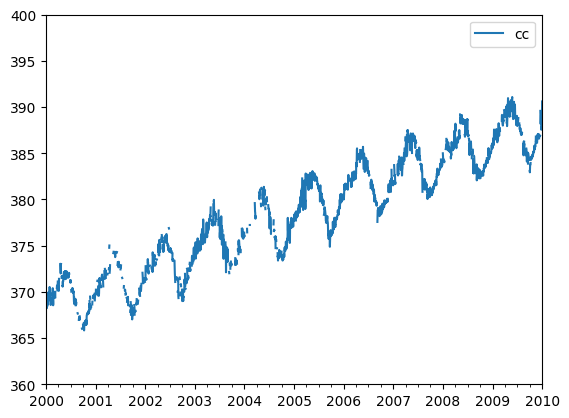

In [10]:
ax = df.plot()
ax.set_xlim('2000','2010')
ax.set_ylim(360,400)
plt.show()

### Cleaning

1. remove nan values (and remove leading / tailing nan
2. resample.mean to week: bridge small holes and recreate periodicity -- and create new nan
3. interpolate and remove all nan

In [11]:
dg = df.copy()
print(dg.shape)
print('nan: ', dg.isnull().sum())

(24045, 1)
nan:  cc    6255
dtype: int64


In [12]:
dg = dg.dropna()
dg.info()
dg[dg['cc'].isnull()]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17790 entries, 1958-03-30 to 2023-10-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc      17790 non-null  float64
dtypes: float64(1)
memory usage: 278.0 KB


,cc


In [13]:
dg

,cc
1958-03-30,316.16
1958-03-31,316.69
1958-04-02,317.67
1958-04-03,317.76
1958-04-04,317.09
...,...
2023-10-17,419.08
2023-10-18,419.19
2023-10-19,419.21
2023-10-20,418.63


In [14]:
dg = dg.resample('w').agg('mean')
dg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3423 entries, 1958-03-30 to 2023-10-29
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc      3283 non-null   float64
dtypes: float64(1)
memory usage: 53.5 KB


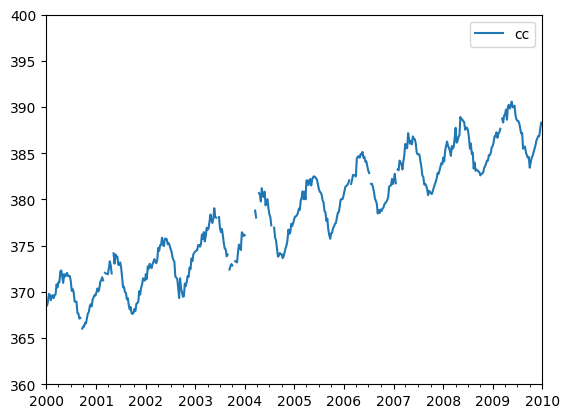

In [15]:
ax = dg.plot()
ax.set_xlim('2000','2010')
ax.set_ylim(360,400)
plt.show()

In [16]:
print('Before interpolation nan: ', dg[dg['cc'].isnull()])

# method = 'time': handles unequal distributed time steps (not needed here because of resampling)
dg = dg.interpolate(method = 'time') 
print('After interpolation nan: ', dg[dg['cc'].isnull()])
print()
dg.info()

Before interpolation nan:              cc
1958-05-18 NaN
1958-06-01 NaN
1958-06-08 NaN
1958-06-15 NaN
1958-06-22 NaN
...         ..
2012-10-07 NaN
2012-10-14 NaN
2020-01-19 NaN
2022-12-11 NaN
2023-08-27 NaN

[140 rows x 1 columns]
After interpolation nan:  Empty DataFrame
Columns: [cc]
Index: []

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3423 entries, 1958-03-30 to 2023-10-29
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cc      3423 non-null   float64
dtypes: float64(1)
memory usage: 53.5 KB


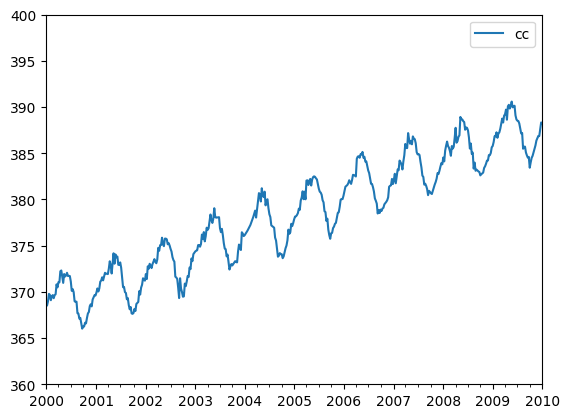

In [17]:
ax = dg.plot()
ax.set_xlim('2000','2010')
ax.set_ylim(360,400)
plt.show()

In [18]:
dg[dg['cc'].isnull()]
#dg.info()

,cc


### Linear Regression

Play around with wfactor

,cc,predict
1958-03-30,316.1600,267.115042
1958-04-06,317.3950,267.160108
1958-04-13,317.1450,267.205174
1958-04-20,317.6175,267.250239
1958-04-27,317.1300,267.295305


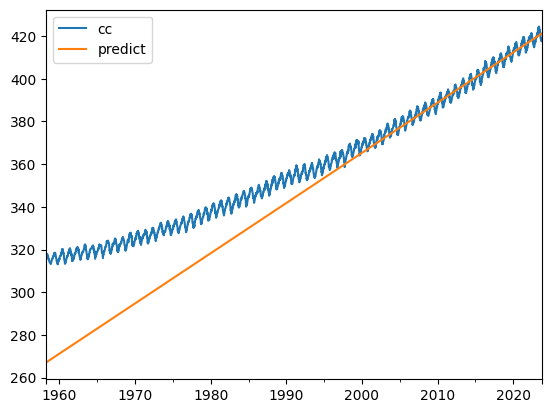

In [19]:
#x = (df.index.to_numpy()).reshape(-1,1)
x = np.array(dg.index.to_numpy(), dtype=float).reshape(-1,1)
y = dg['cc']

wfactor = 1 #0 # 0 #0.5 # 1# -1
weight = (np.exp(x.astype(float)/1e17 * wfactor)).reshape(-1,)

model = LinearRegression()
model.fit(x,y, sample_weight=weight)

y_pred = model.predict(x)
dg['predict'] = y_pred
dg.plot()
plt.show

dg.head()

## Extrapolate

Question: extrapolate to 2100

Linear regression was easy. 

Main problem now: how to hande datetime-numbers.



2100-12-31:  602.8 ppm


<Axes: >

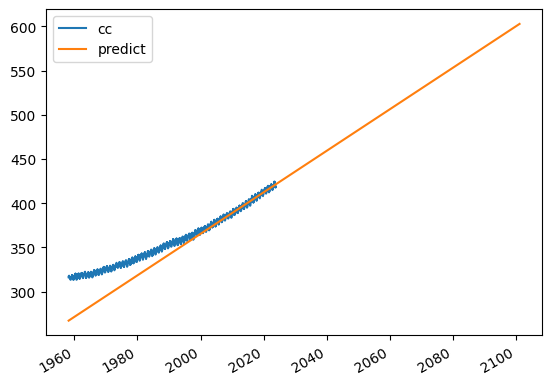

In [20]:
extrapoint = '2100-12-31'
x_futd =  np.datetime64(extrapoint, 'ns')
x_fut = x_futd.astype(float).reshape(-1,1) 
y2100 = model.predict(x_fut)[0]
print(f'{extrapoint}: {y2100:6.1f} ppm')
df
dg.loc[x_futd] = [np.nan, y2100]
dg.plot()



## Decarbonisation power of plants


In [21]:
%reset -f

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#fn = 'https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/daily/daily_in_situ_co2_mlo.csv'
fn = 'data/daily_in_situ_co2_mlo.zip' # till 2023
#fn = '/home/rp/Downloads/otto.csv'

df = pd.read_csv(fn, sep='[, ]+', engine="python", comment='%', header=None,
                 na_values='NaN',
                 names =  ['year', 'month', 'day', 'cc', 'nb', 'scale', 'sta']                 
                )
df.index = pd.to_datetime(df[['year', 'month', 'day']])
df = df[['cc']]
df

,cc
1958-01-01,NaN
1958-01-02,NaN
1958-01-03,NaN
1958-01-04,NaN
1958-01-05,NaN
...,...
2023-10-27,NaN
2023-10-28,NaN
2023-10-29,NaN
2023-10-30,NaN


<Axes: >

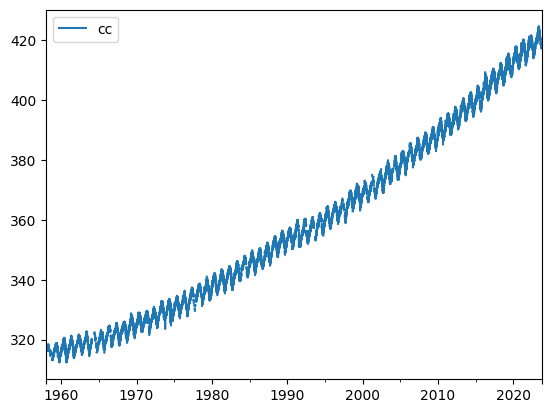

In [22]:
df.plot()

In [23]:
dg = df.copy()
dg = dg.dropna()
# define window for one year, if 'w' then 52
window = 12
dg = dg.resample('M').agg('mean')
dg = dg.interpolate(method = 'time') 
print('nan: ', dg.isnull().sum())

nan:  cc    0
dtype: int64


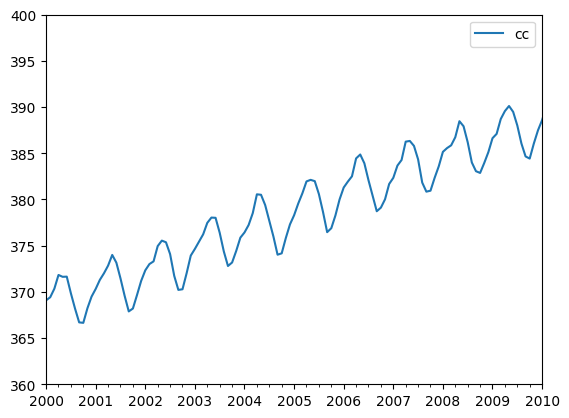

In [24]:
ax = dg.plot()
ax.set_xlim('2000','2010')
ax.set_ylim(360,400)
plt.show()

In [25]:
dg['mean'] = dg['cc'].rolling(window=window).mean()
dg['no_trend'] = dg['cc']-dg['mean']
dg = dg.dropna()
print('nan: ', dg.isnull().sum())
dg

nan:  cc          0
mean        0
no_trend    0
dtype: int64


,cc,mean,no_trend
1959-02-28,316.658000,315.621381,1.036619
1959-03-31,316.792632,315.652017,1.140614
1959-04-30,317.642593,315.669028,1.973565
1959-05-31,318.215625,315.731071,2.484554
1959-06-30,318.123529,315.855840,2.267690
...,...,...,...
2023-06-30,423.334500,419.341111,3.993389
2023-07-31,421.452941,419.582406,1.870535
2023-08-31,419.566667,419.812128,-0.245461
2023-09-30,418.044667,420.026171,-1.981504


<Axes: >

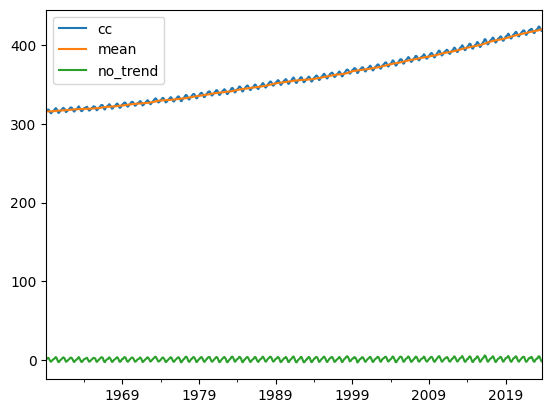

In [26]:
dg.plot()

(390.0, 420.0)

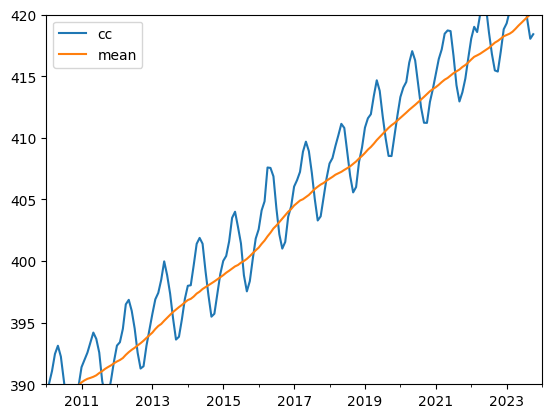

In [27]:
ax = dg[['cc','mean']].plot()
ax.set_xlim('2010','2024')
ax.set_ylim(390,420)

(480.0, 648.0)

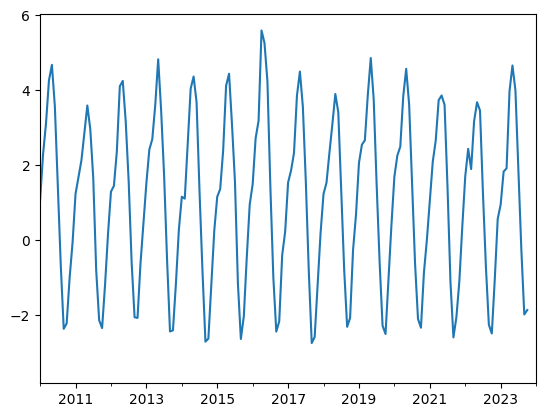

In [28]:
ax = dg['no_trend'].plot()
ax.set_xlim('2010','2024')

The annual variation change is about 6 ppm.

##  Change of CO2 ppm per year

calculate dy/dx   
dx = 1 year

### Calculate yearly mean

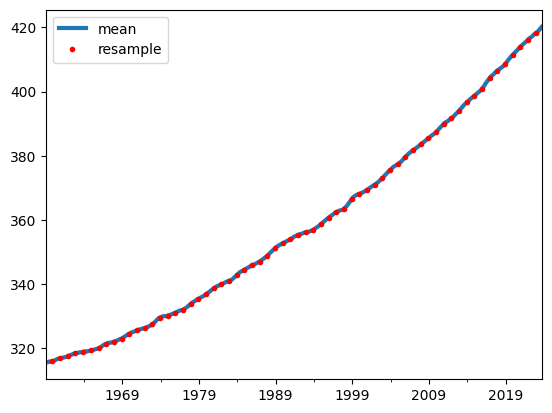

In [29]:
dh = dg.copy()
dh['resample'] = dh['cc'].resample('y').mean()

ax = dh[['mean']].plot(lw=3)
dh[['resample']].plot(style='.', ax=ax, color='red')

plt.show()

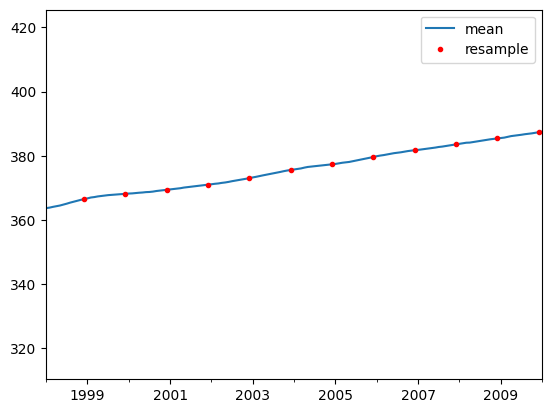

In [30]:
ax = dh[['mean']].plot()
dh[['resample']].plot(style='.', ax=ax, color='red')
ax.set_xlim('1998', '2010')

plt.show()

In [31]:
dk = dh.copy()
dk

,cc,mean,no_trend,resample
1959-02-28,316.658000,315.621381,1.036619,NaN
1959-03-31,316.792632,315.652017,1.140614,NaN
1959-04-30,317.642593,315.669028,1.973565,NaN
1959-05-31,318.215625,315.731071,2.484554,NaN
1959-06-30,318.123529,315.855840,2.267690,NaN
...,...,...,...,...
2023-06-30,423.334500,419.341111,3.993389,NaN
2023-07-31,421.452941,419.582406,1.870535,NaN
2023-08-31,419.566667,419.812128,-0.245461,NaN
2023-09-30,418.044667,420.026171,-1.981504,NaN


In [33]:
dk = dk.dropna()
dk.shape

(64, 4)

In [40]:
# guarantee equal distributed values without nan
dk = dk.resample('y').mean()
dk = dk.dropna()
dk.head()

,cc,mean,no_trend,resample
1959-12-31,315.522800,316.009312,-0.486512,316.047250
1960-12-31,316.159630,316.885958,-0.726328,316.885958
1961-12-31,316.988750,317.628922,-0.640172,317.628922
1962-12-31,317.577500,318.446647,-0.869147,318.446647
1963-12-31,318.297407,318.911348,-0.613940,318.911348


In [41]:
dk['d_resample'] = dk['resample'].diff(1)

<Axes: >

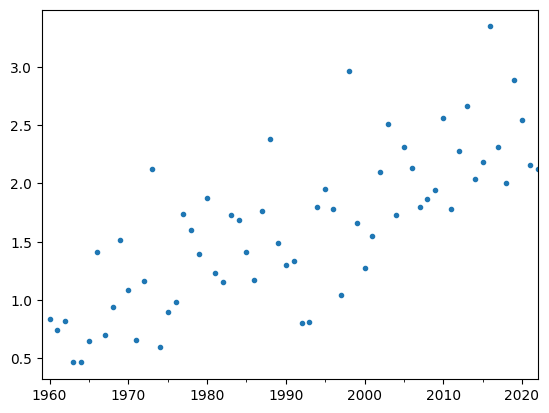

In [42]:
dk['d_resample'].plot(style='.')

In [45]:
dk['mean10_d_resample'] = dk['d_resample'].rolling(window=10).mean()

<Axes: >

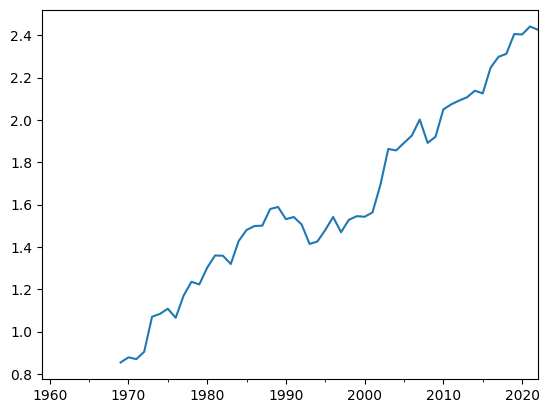

In [46]:
dk['mean10_d_resample'].plot()

Change rate about 2.4 ppm/a.
